# EcoFOCIpy ADCP QC - 21BSP-2A

- mostly remove >500 cm/s flows in u/v


In [2]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [3]:
xdf = xa.load_dataset('/Users/bell/ecoraid/2022/Moorings/22upp3a/final_data_cf/22upp3a_velein_0068m.nc')

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabe

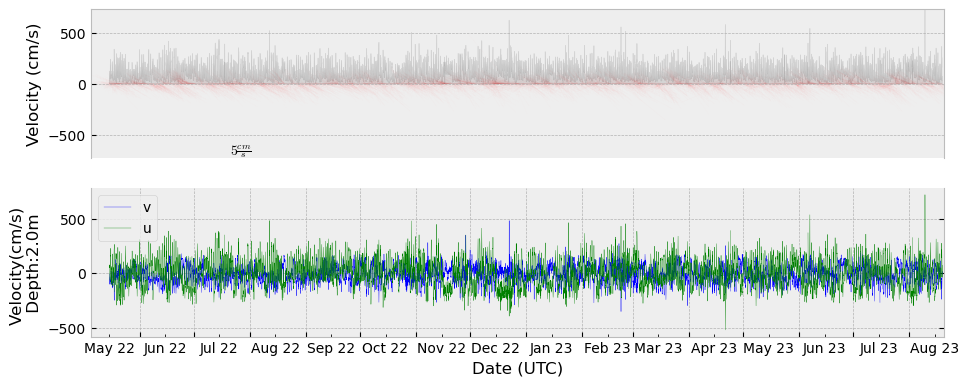

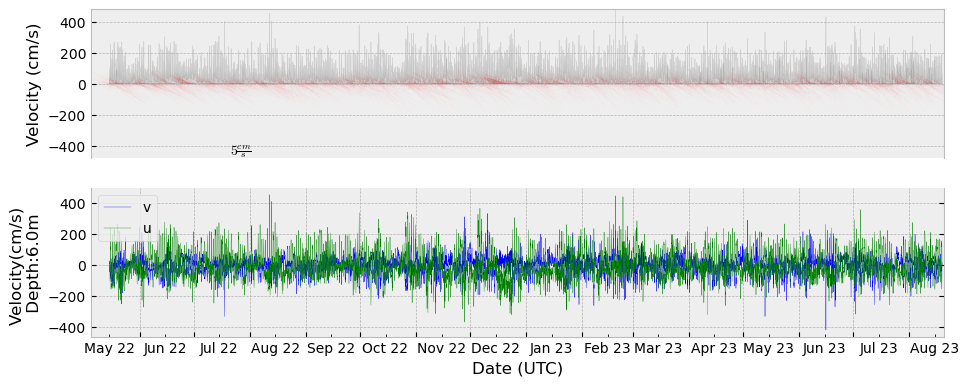

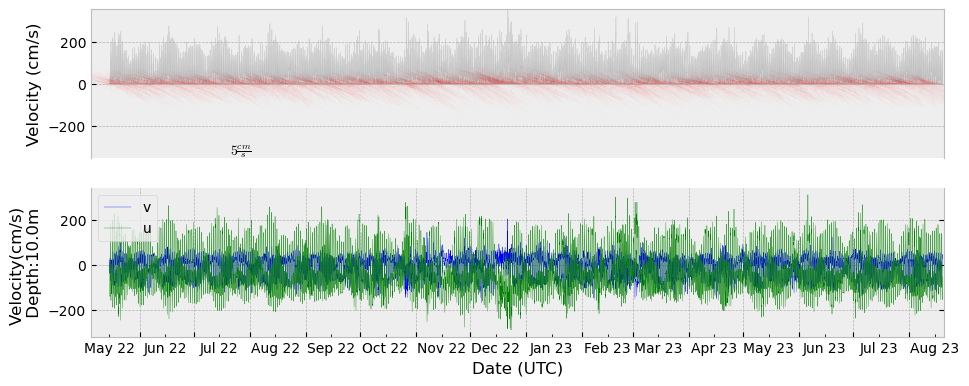

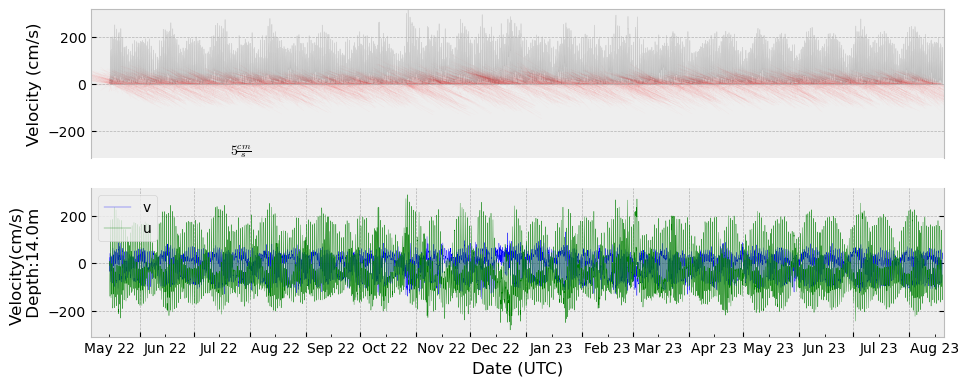

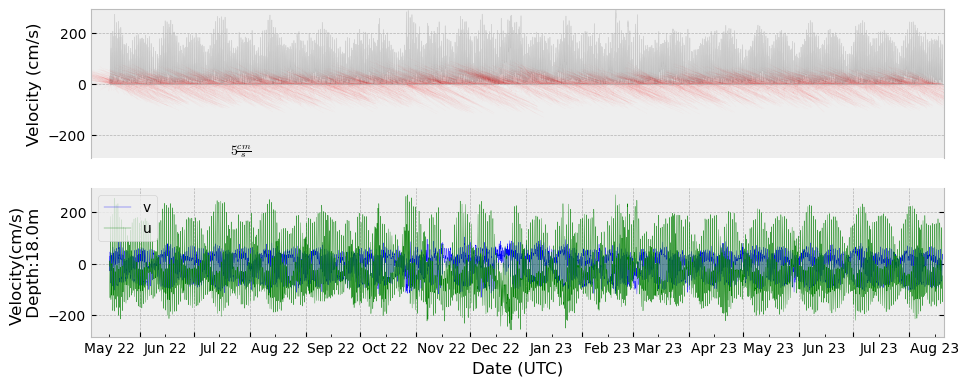

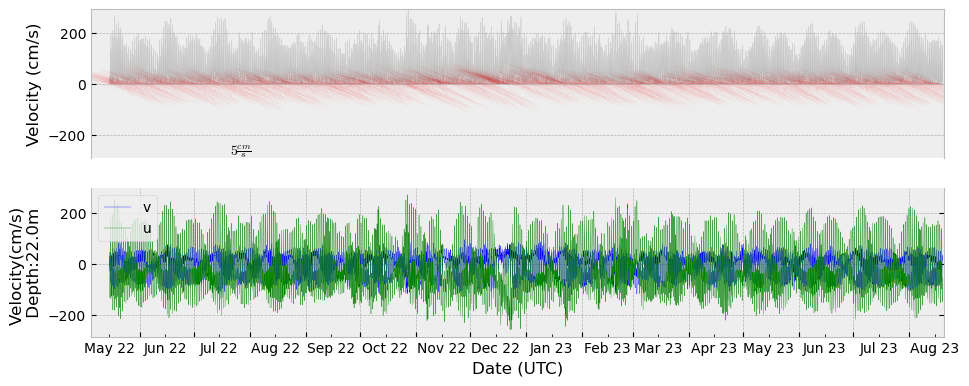

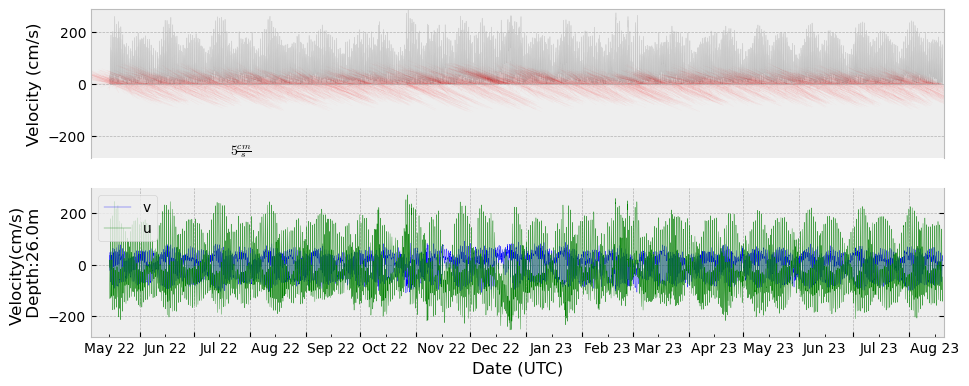

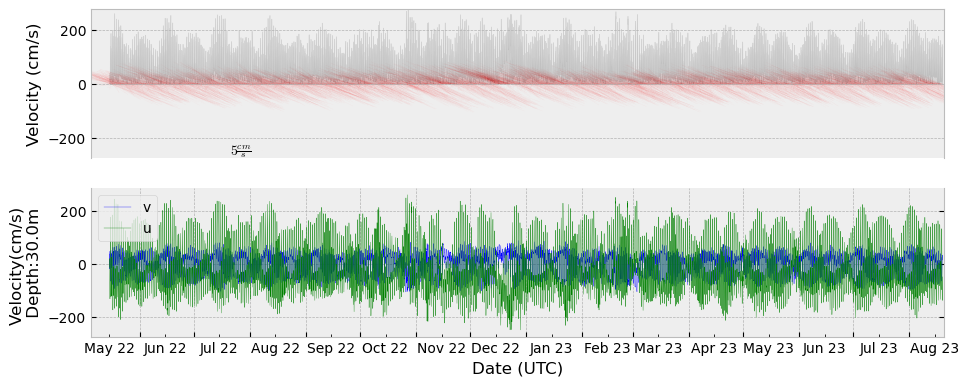

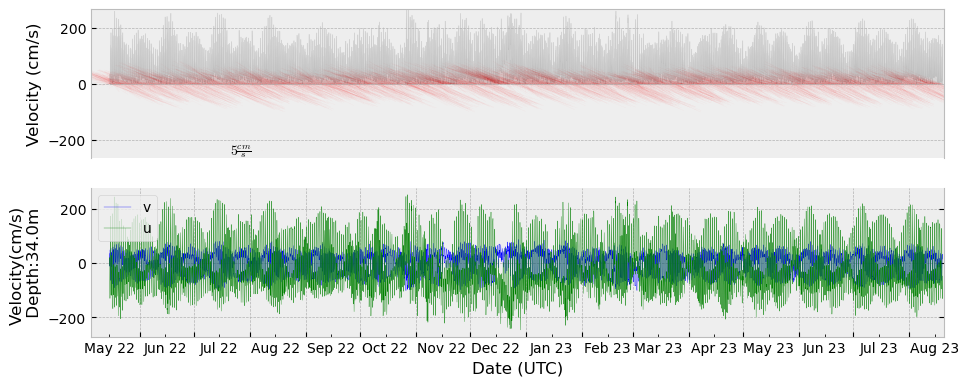

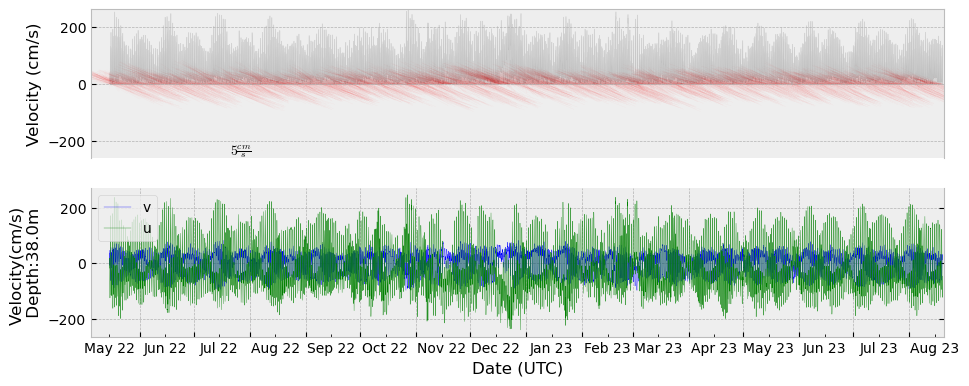

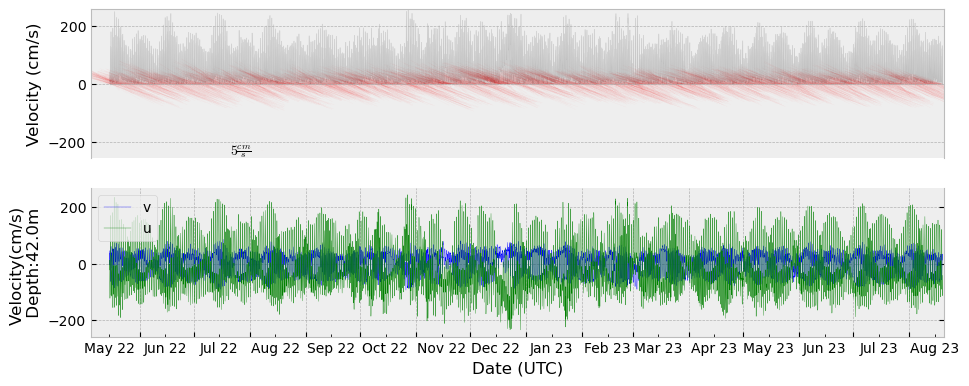

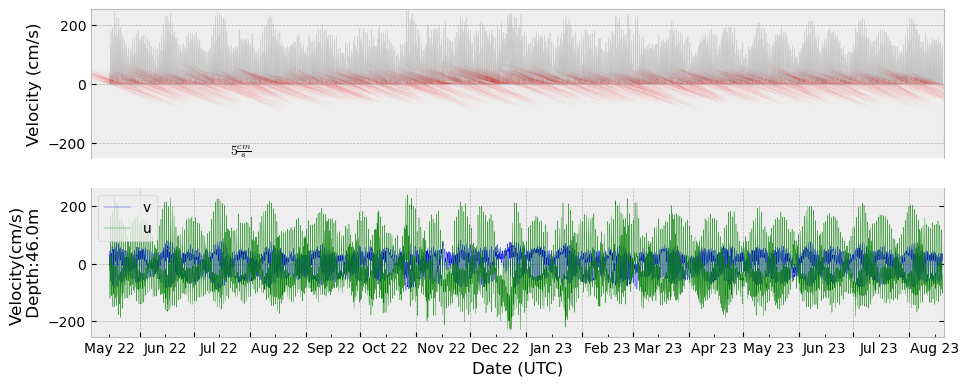

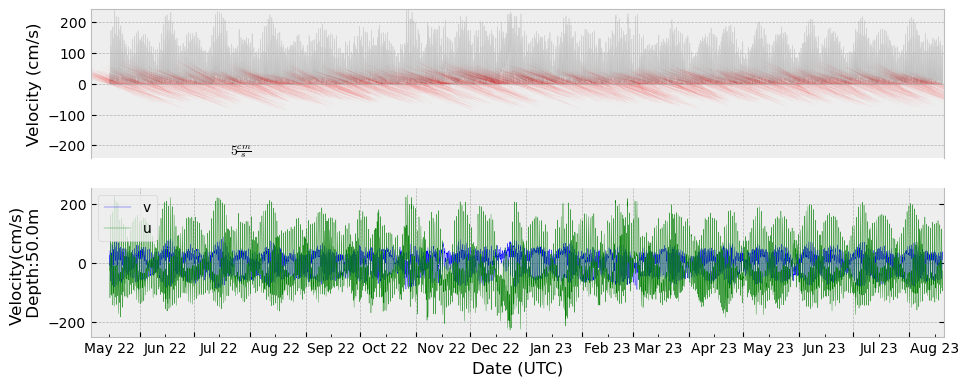

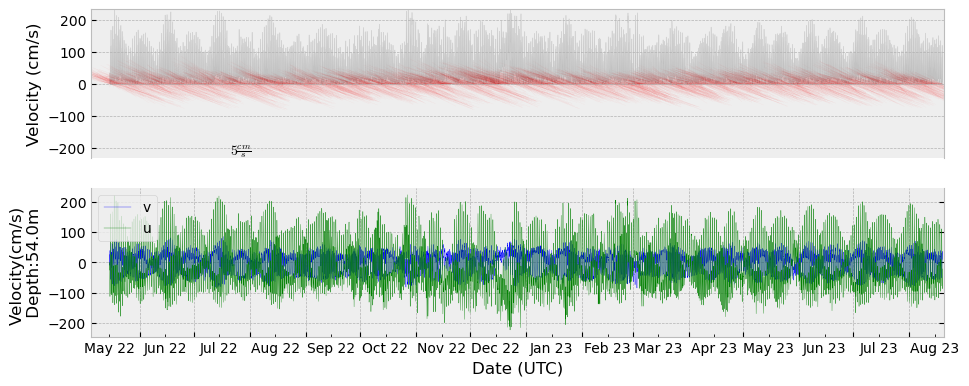

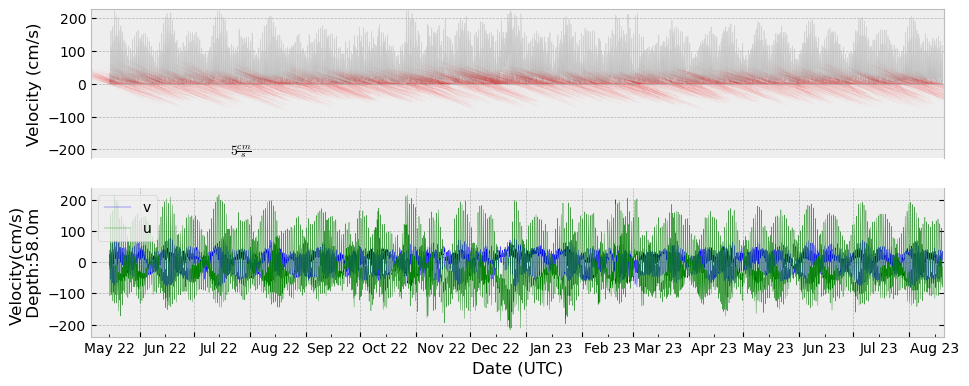

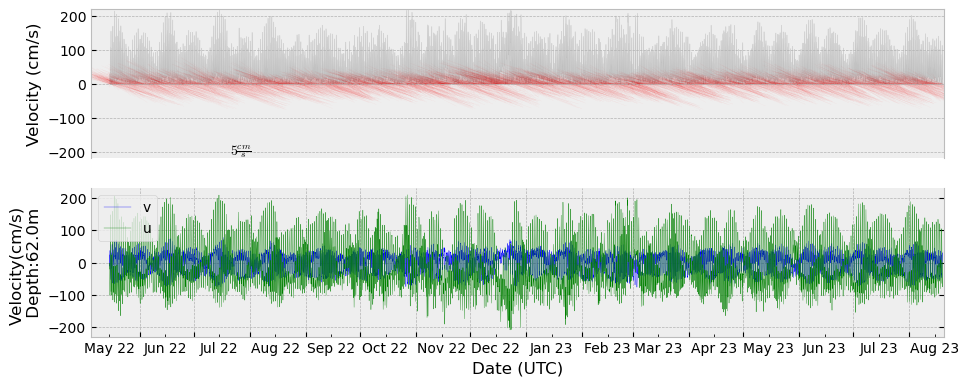

In [4]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [5]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=750,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 11326, depth: 16)
Coordinates:
  * time             (time) datetime64[ns] 2022-05-05 ... 2023-08-19T21:00:00
  * depth            (depth) float64 2.0 6.0 10.0 14.0 ... 50.0 54.0 58.0 62.0
  * latitude         (latitude) float64 54.31
  * longitude        (longitude) float64 -164.8
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    v_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... nan
    agc1             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc2             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc3             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc4             (latitude, longitude, time, depth) float64 nan nan ... nan
Attributes: (12/13)
    Latitude_DegMMddW:                      54 18.34 N
    Longitude_DegMMddN:                     164 45.14 W
    MooringID:                              22UPP-3A
    platform_deployment_date:               2022-05-15T03:23:00Z
    platform_deployment_cruise_name:        DY2206
    platform_recovery_date:                 2023-08-19T04:26:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             74.0
    date_created:                           2024-03-06T14:41:51Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                  removed U,V >750cm/s  trimmed a...

In [10]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

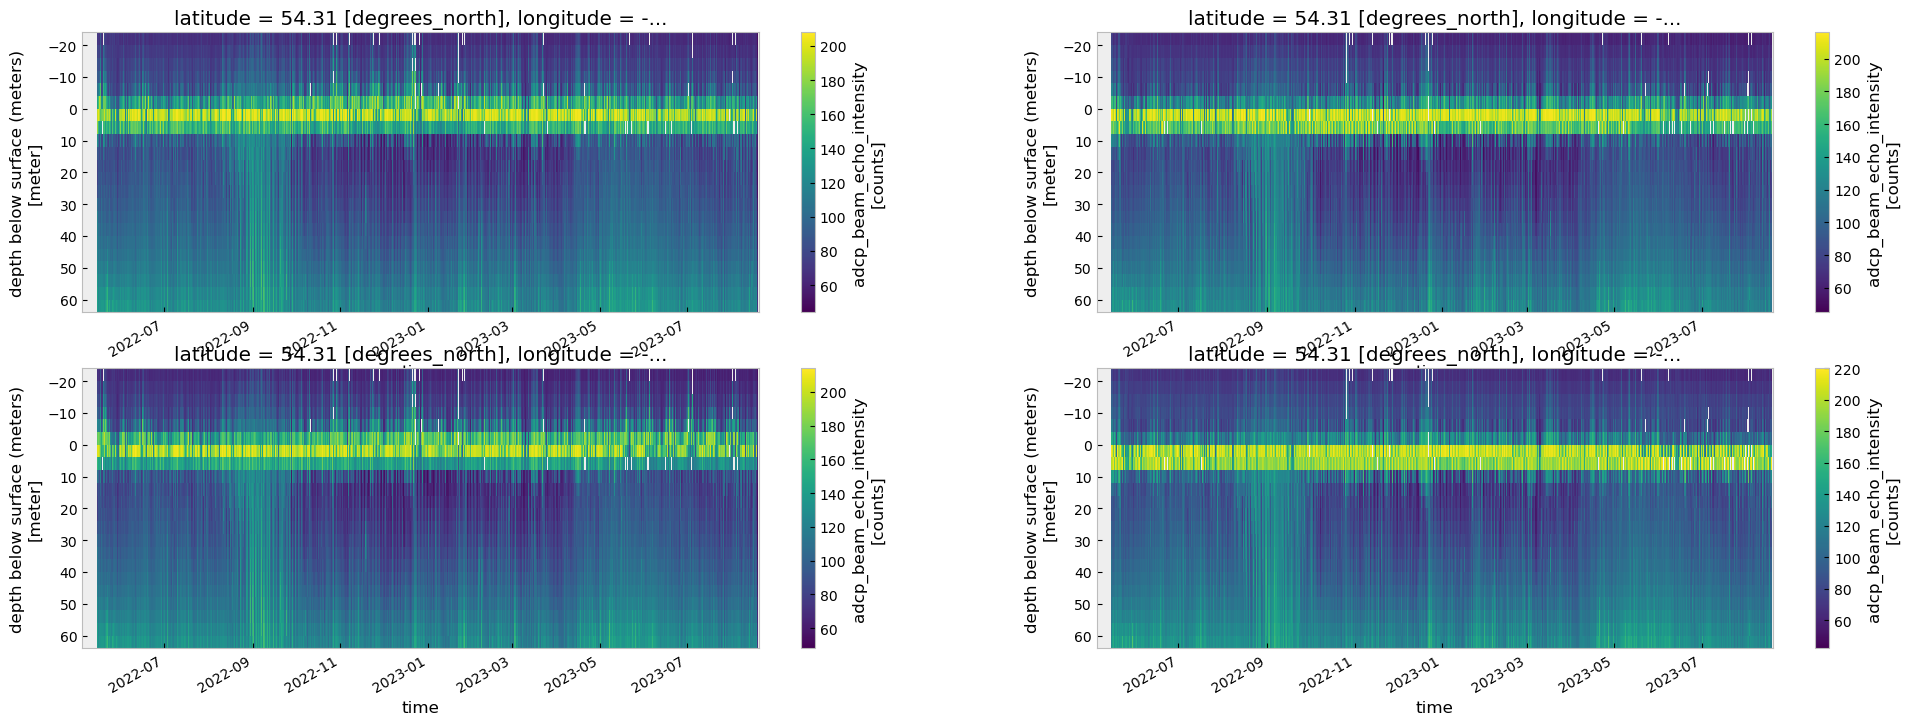

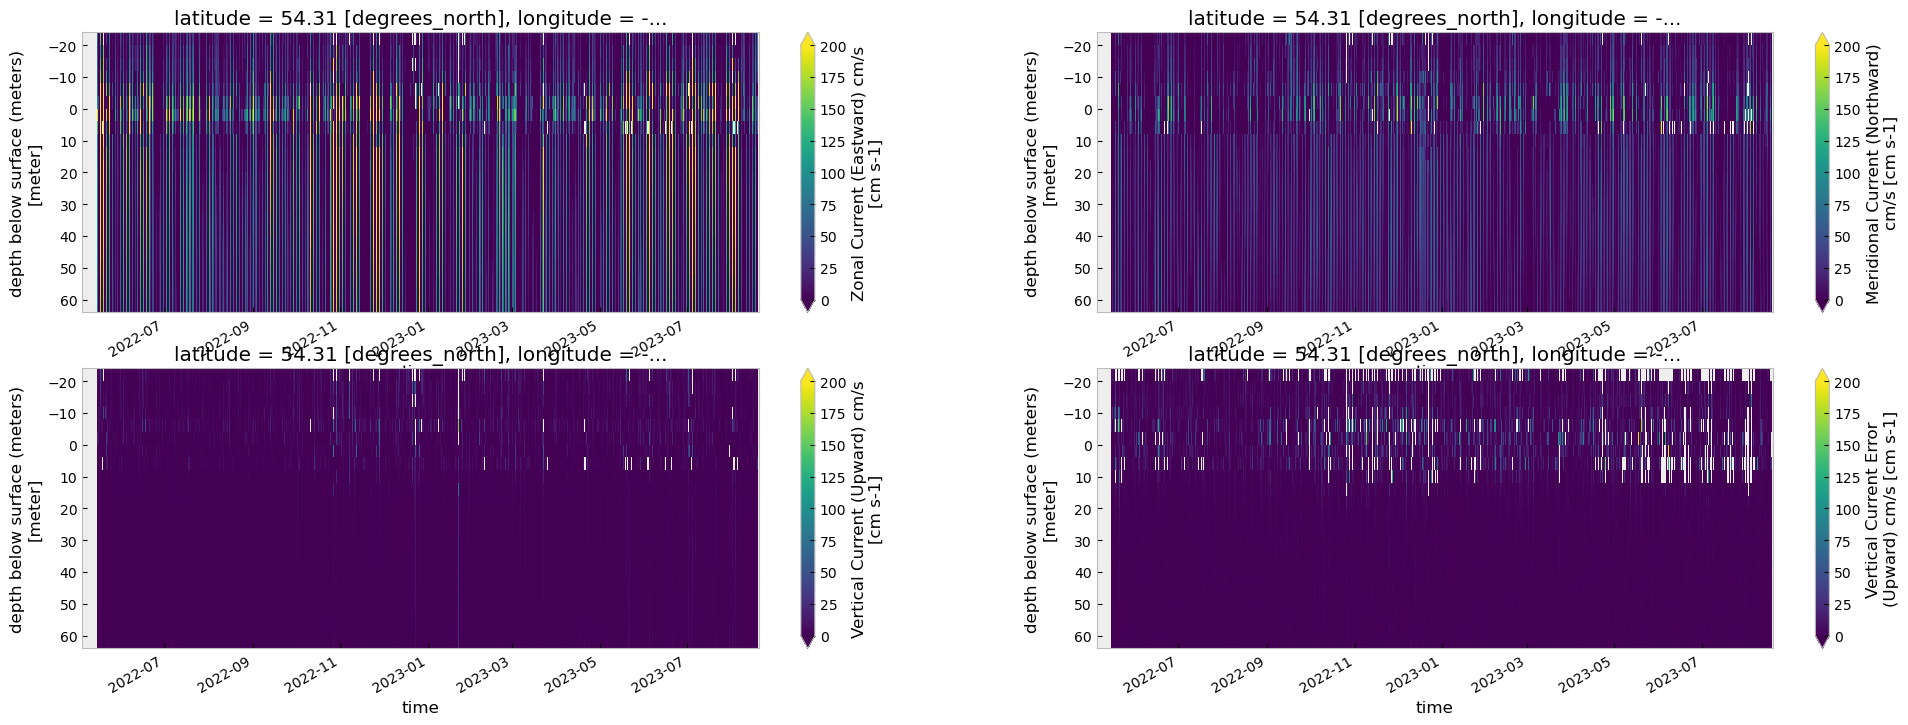

In [18]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [19]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >750cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >750cm/s'    

## Trim above surface (negative values)

In [20]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [21]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [22]:
ixdf.to_netcdf('22upp3a_0068m.trimmed.nc')

In [23]:
xdf = xa.load_dataset('22upp3a_0068m.trimmed.nc')

In [24]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [25]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [26]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [27]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

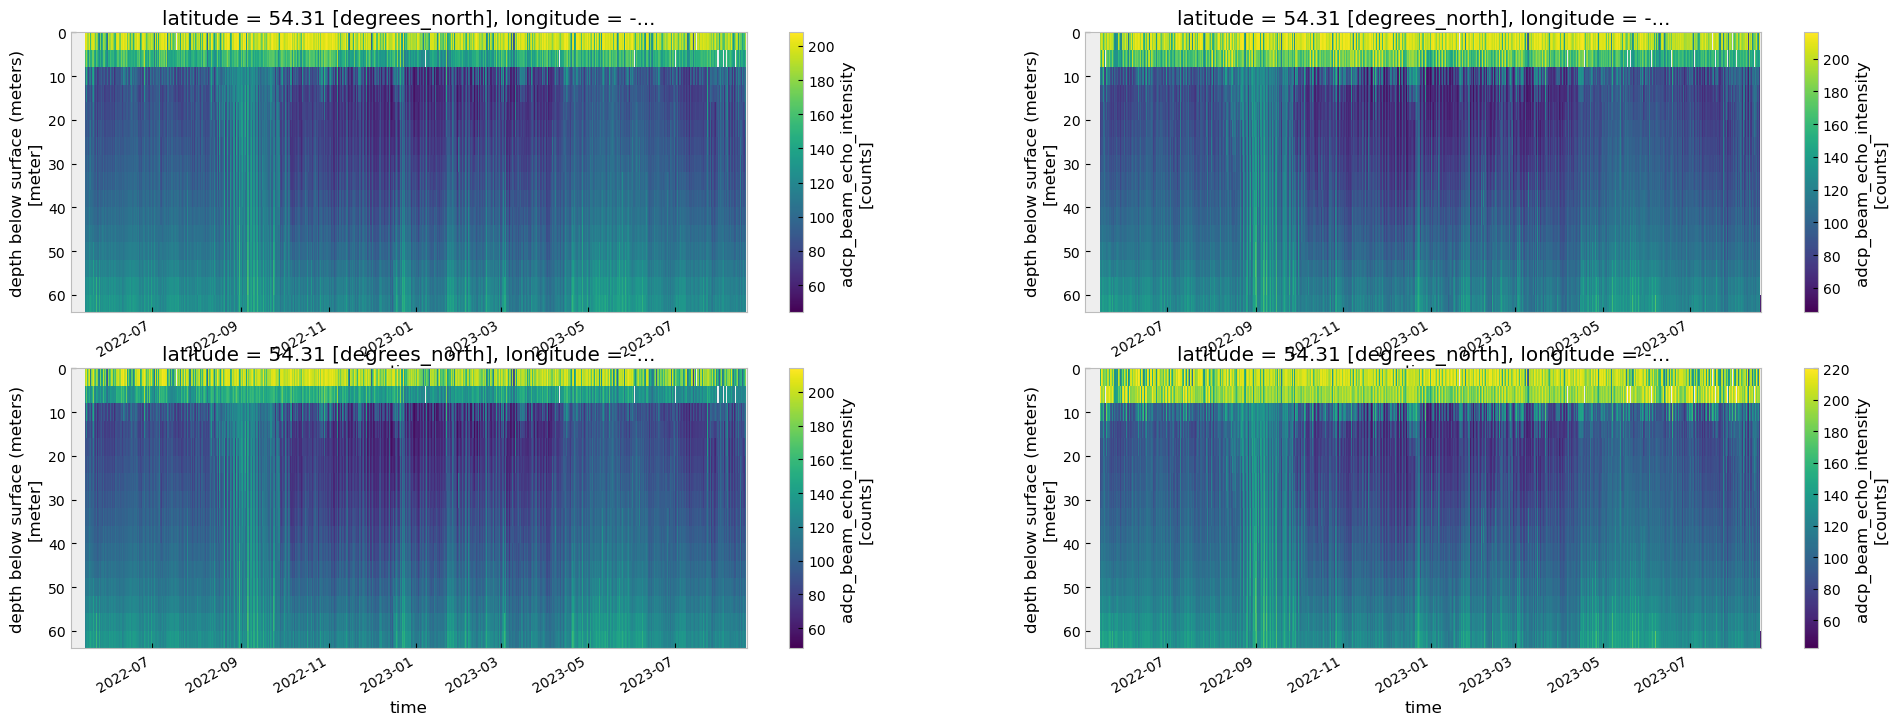

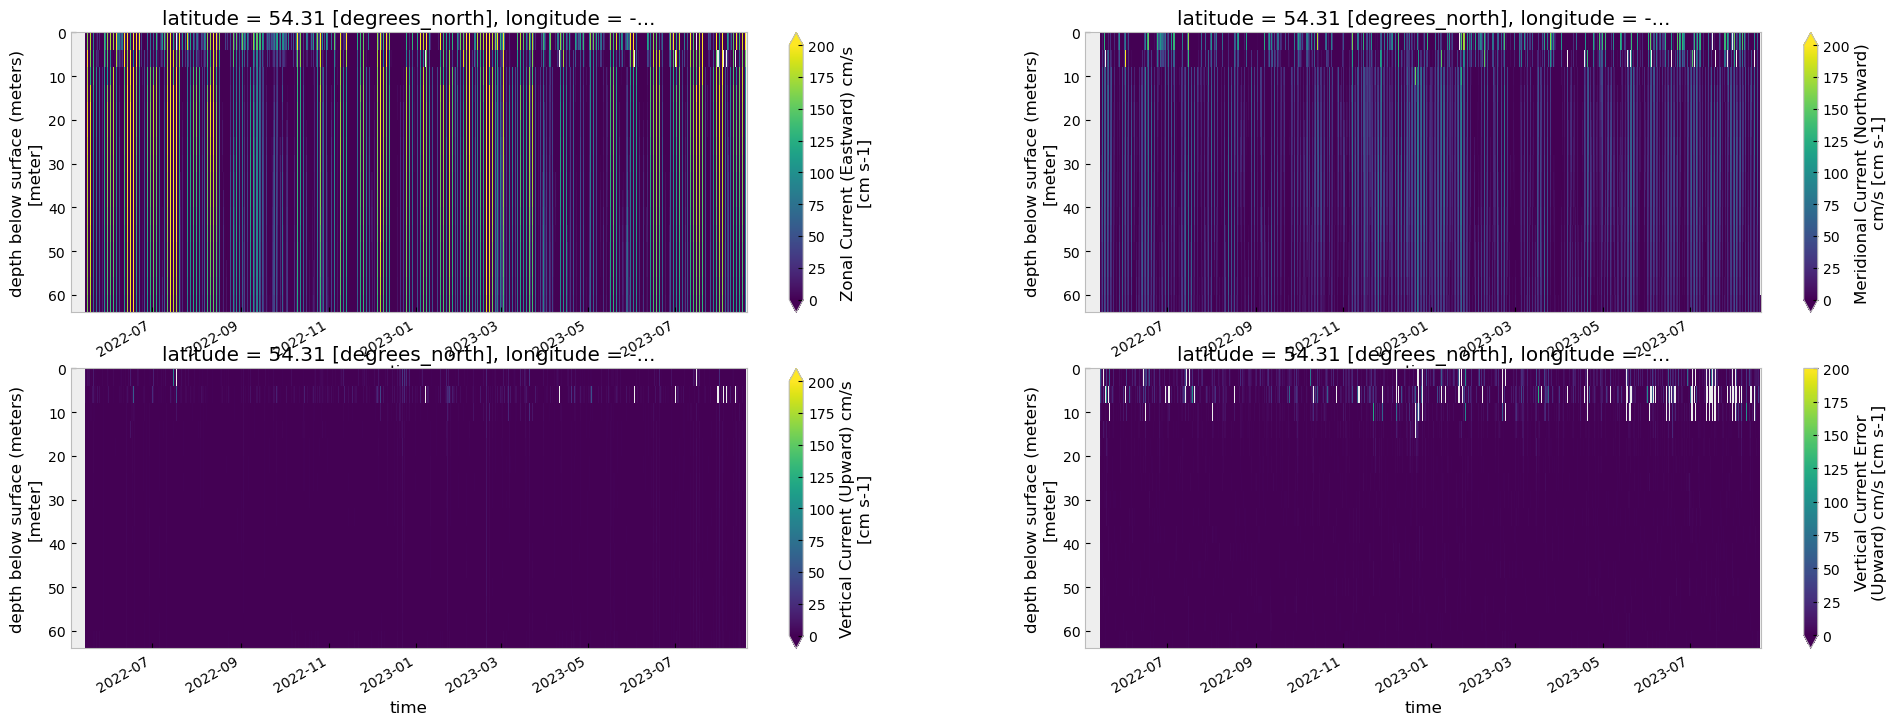

In [28]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [29]:
ixdf.to_netcdf('22upp3a_0068m.filtered.nc')